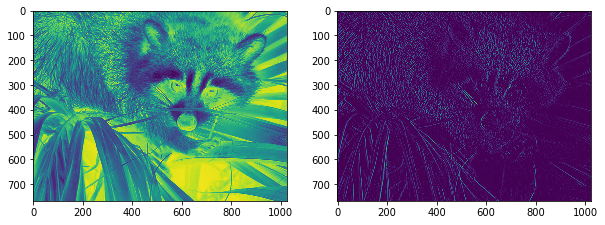

In [14]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage # scikit_image
import scipy.misc

# 반전 255에서 어떤색을 빼면 반전
img = 255 - sp.misc.face(gray=True).astype(float) # 이미지, 동영상
# dege detection filter - 경계선 검출

# 1 -1
# 1 -1
# 바뀌는 부분만 검출
k = np.zeros((2,2))
k[:,0]=1
k[:,1]=-1

img2 = np.maximum(0,sp.ndimage.filters.convolve(img,k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

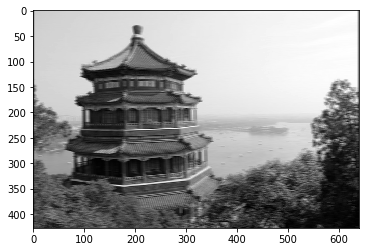

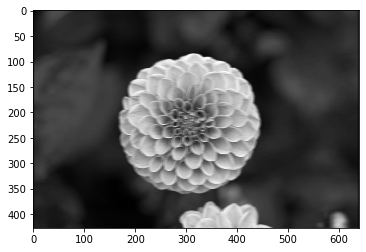

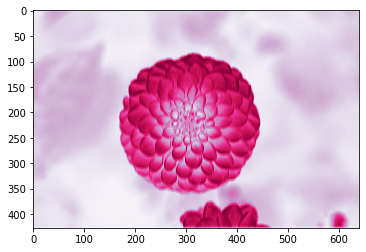

(2, 427, 640, 2)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf

china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype = np.float32)
batch_size , height, width, channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

convolution = tf.nn.conv2d(X, filters, strides = [1,1,1,1], padding='SAME')



with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X:dataset})
    
plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0], cmap='PuRd')
plt.show()

type(output)
print(output.shape)
# 필터가 2개다
# 2, 427, 640, 2

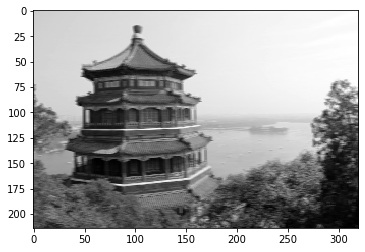

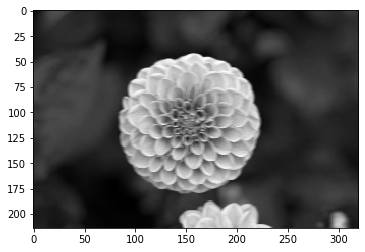

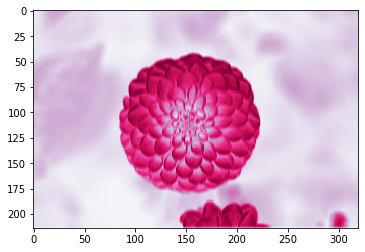

(2, 214, 320, 2)


In [22]:
max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X:dataset})

plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0], cmap='PuRd')
plt.show()

type(output)
print(output.shape)
# 필터가 2개다
# 2, 427, 640, 2